The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure.


Each instance is described by:

- the first four numbers are expert designed features (you can ignore them for the classification task),
- the next item is an ID,
- then we have a number of resonance frequencies with their "multiplicity", and
- finally the class.



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
file_path = 'data/diterpene_shuf.csv'
data = pd.read_csv(file_path)

### Dataset Structure

In [22]:
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns)
print("\nFirst 5 Rows:")
print(data.head())

Dataset Shape: (1202, 46)

Column Names: Index(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
       'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40',
       'a41', 'a42', 'a43', 'a44', 'a45c'],
      dtype='object')

First 5 Rows:
   a0  a1  a2  a3     a4 a5     a6 a7     a8 a9  ...    a36 a37   a38 a39  \
0   2   4   8   6  v1493  t  139.2  q   33.2  d  ...  134.5   t  24.2   q   
1   2   4   8   6  v1255  d  144.0  q   66.7  d  ...   22.4   s  37.7   q   
2   2   4   8   6  v2194  d   30.7  t   26.8  t  ...   16.7   t  35.4   q   
3   3   4   9   4  v2021  t   37.2  t   17.4  q  ...   33.5   d  44.9   d   
4   3   4   9   4  v1051  q   12.2  d  154.6  t  ...   49.5   t  38.8   t   

    a40 a41   a42 a43    a44 a45c  
0  14.4   t  42.2   t   18.6  52c  
1  19.7   q  16.5   t   26.6  54c  
2 

The dataset has 1202 instances (rows) and 46 variables (columns). The first 45 columns are named ax, x being a number from 0 to 45, and the last column is named a45c.

In [23]:
print("\nData Types for Each Column:")
print(data.dtypes)

print("\nSummary of Value Types:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"  - Data Type: {data[column].dtype}")
    print(f"  - Number of Unique Values: {len(unique_values)}")
    print(f"  - Example Values: {unique_values[:5]}")
    print("-" * 40)


Data Types for Each Column:
a0        int64
a1        int64
a2        int64
a3        int64
a4       object
a5       object
a6      float64
a7       object
a8      float64
a9       object
a10     float64
a11      object
a12     float64
a13      object
a14     float64
a15      object
a16     float64
a17      object
a18     float64
a19      object
a20     float64
a21      object
a22     float64
a23      object
a24     float64
a25      object
a26     float64
a27      object
a28     float64
a29      object
a30     float64
a31      object
a32     float64
a33      object
a34     float64
a35      object
a36     float64
a37      object
a38     float64
a39      object
a40     float64
a41      object
a42     float64
a43      object
a44     float64
a45c     object
dtype: object

Summary of Value Types:
Column: a0
  - Data Type: int64
  - Number of Unique Values: 4
  - Example Values: [2 3 4 1]
----------------------------------------
Column: a1
  - Data Type: int64
  - Number of Unique Values: 6

Patterns in the dataset:
- first 4 columns are of type integer, having 4, 6, 8, 8 unique values respectively (=> we should ignore them as specified in the task)
- column a4 (5th column) is of type "object", has 1202 unique values, example values: 'v1493', 'v1255' (IDs)
- starting from the 6th column, every other column is of type char, with the following unique values: ['t' 'd' 'q' 's'] (=> categorical variables)
- starting from the 7th column, every other column is of type float64 with similar ranges (=> numerical variable)
- the last column (a45c) is of type "object", has 22 unique values, example values: '52c', '54c', '3c' (=> categorical variable) - class -> output variable

### Preprocessing

As the first four columns are not important for the classification task, we will delete them.

In [24]:
data = data.iloc[:, 5:] 

In [25]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
a5      0
a6      0
a7      0
a8      0
a9      0
a10     0
a11     0
a12     0
a13     0
a14     0
a15     0
a16     0
a17     0
a18     0
a19     0
a20     0
a21     0
a22     0
a23     0
a24     0
a25     0
a26     0
a27     0
a28     0
a29     0
a30     0
a31     0
a32     0
a33     0
a34     0
a35     0
a36     0
a37     0
a38     0
a39     0
a40     0
a41     0
a42     0
a43     0
a44     0
a45c    0
dtype: int64


There are no missing values.

In [26]:
categorical_columns = [col for col in data.columns[:-1:2]]  # Alternating categorical columns
numerical_columns = [col for col in data.columns[1:-1:2]]  # Alternating numerical columns
class_column = data.columns[-1]  # The last column is the target class

In [27]:

print(f"Categorical Columns: {categorical_columns}")
print(f"Numerical Columns: {numerical_columns}")
print(f"Class Column: {class_column}")

Categorical Columns: ['a5', 'a7', 'a9', 'a11', 'a13', 'a15', 'a17', 'a19', 'a21', 'a23', 'a25', 'a27', 'a29', 'a31', 'a33', 'a35', 'a37', 'a39', 'a41', 'a43']
Numerical Columns: ['a6', 'a8', 'a10', 'a12', 'a14', 'a16', 'a18', 'a20', 'a22', 'a24', 'a26', 'a28', 'a30', 'a32', 'a34', 'a36', 'a38', 'a40', 'a42', 'a44']
Class Column: a45c


In [28]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [29]:
X = data.iloc[:, :-1]  # All columns except the last (features)
y = data.iloc[:, -1]   # Last column (target)
class_counts = y.value_counts()
print(class_counts)

a45c
52c    359
3c     285
54c    280
22c    119
4c      59
5c      28
47c     10
36c     10
18c     10
28c      8
33c      7
2c       7
71c      5
80c      5
15c      2
79c      2
46c      1
8c       1
64c      1
31c      1
60c      1
10c      1
Name: count, dtype: int64


Some classes are underrepresented (especially those with only one training example).
To decide what to do, expertise knowledge is required. Rather than deleting the columns, we merge the underrepresented classes into class "Other" in order to retain the information of the dataset.

In [30]:
rare_classes = class_counts[class_counts < 2].index
y = y.replace(rare_classes, 'Other')

In [31]:
# Encode the class column
class_encoder = LabelEncoder()
y = pd.Series(class_encoder.fit_transform(y), index=y.index, name=y.name)

We should scale the numerical variables, but first we have to split the dataset into training and test set, otherwise there would be data leakage.

In [33]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Scale the numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])  # Fit on training data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])       # Transform test data


In [35]:
print("\nPreprocessed Data Head:")
display(X_train.head())


Preprocessed Data Head:


,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44
841,3,-0.846951,2,-0.495679,3,-0.917797,1,0.292216,2,-0.067212,...,1,-0.920165,3,1.576692,1,-0.854087,3,-0.739728,2,-0.192622
71,1,-0.549504,2,-0.440505,1,-0.856079,3,-0.524183,1,2.343057,...,3,-0.521300,0,-0.260329,1,-0.876471,3,2.938576,3,-0.452657
952,3,1.807190,3,1.731144,2,-0.558128,0,-0.061118,2,-0.238609,...,0,-0.096563,3,-0.837803,0,1.773735,3,3.025000,1,0.145201
1109,1,0.333684,1,-0.901760,0,-0.481512,0,1.863565,3,0.348425,...,2,-0.499740,3,-0.491319,3,1.632719,3,-0.878850,0,-0.292635
947,0,1.550928,3,-0.449333,3,1.655220,1,0.243934,3,1.513925,...,2,-0.374690,3,1.151758,0,-0.126624,1,2.318850,1,-1.099409


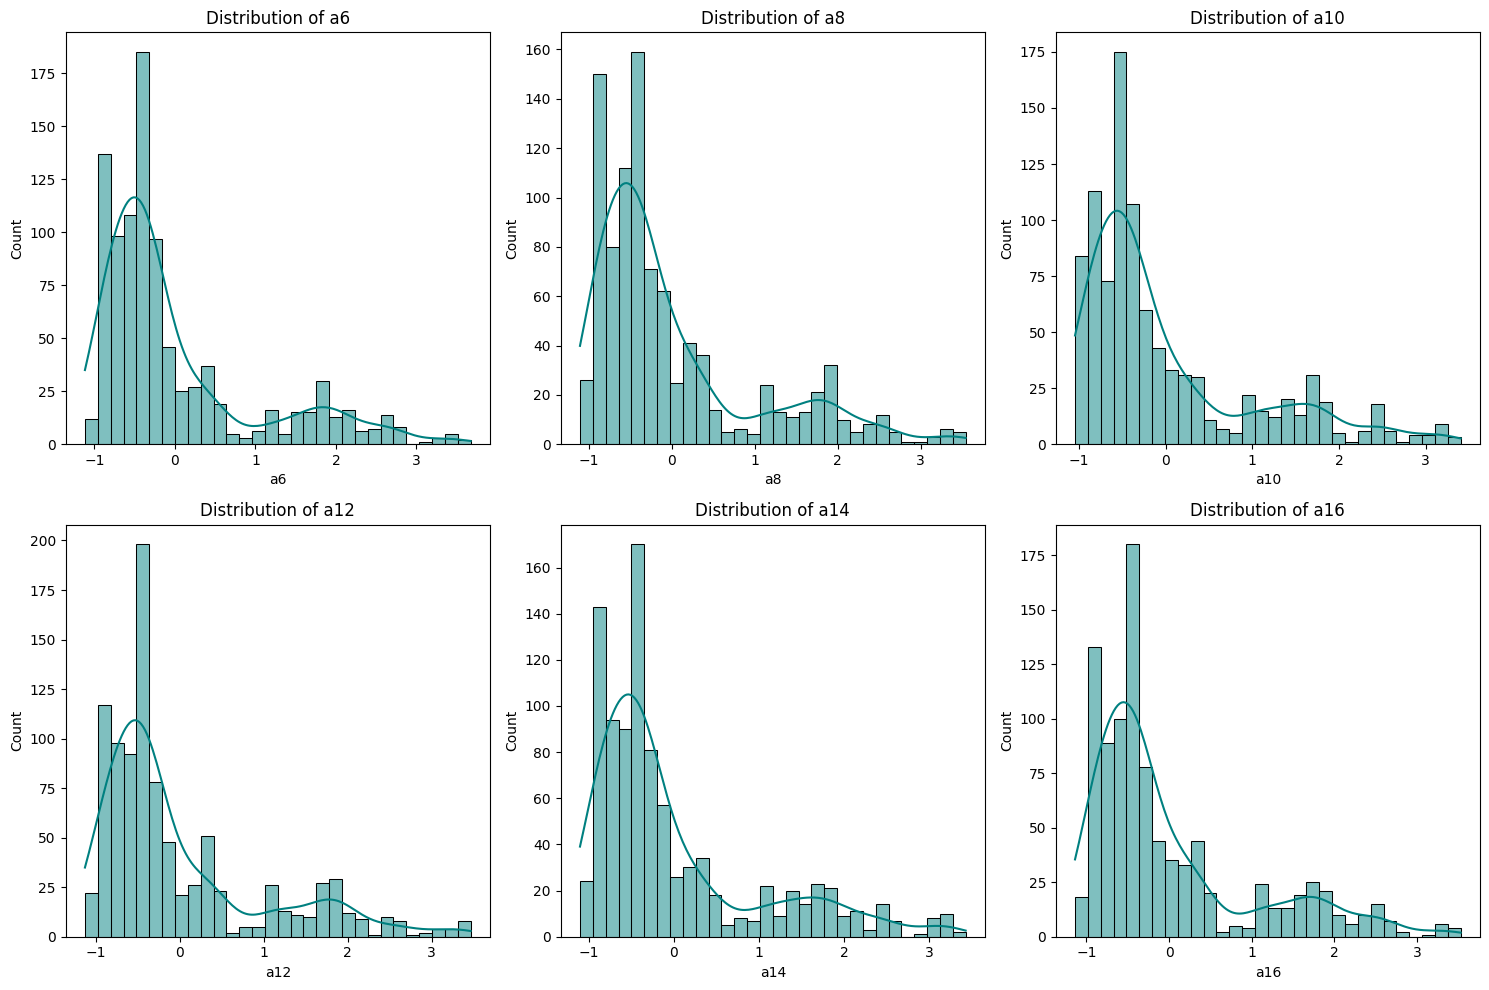

In [36]:
# 1. Distribution of Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # Plot first 6 numerical columns
    plt.subplot(2, 3, i)
    sns.histplot(X_train[col], kde=True, color='teal', bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


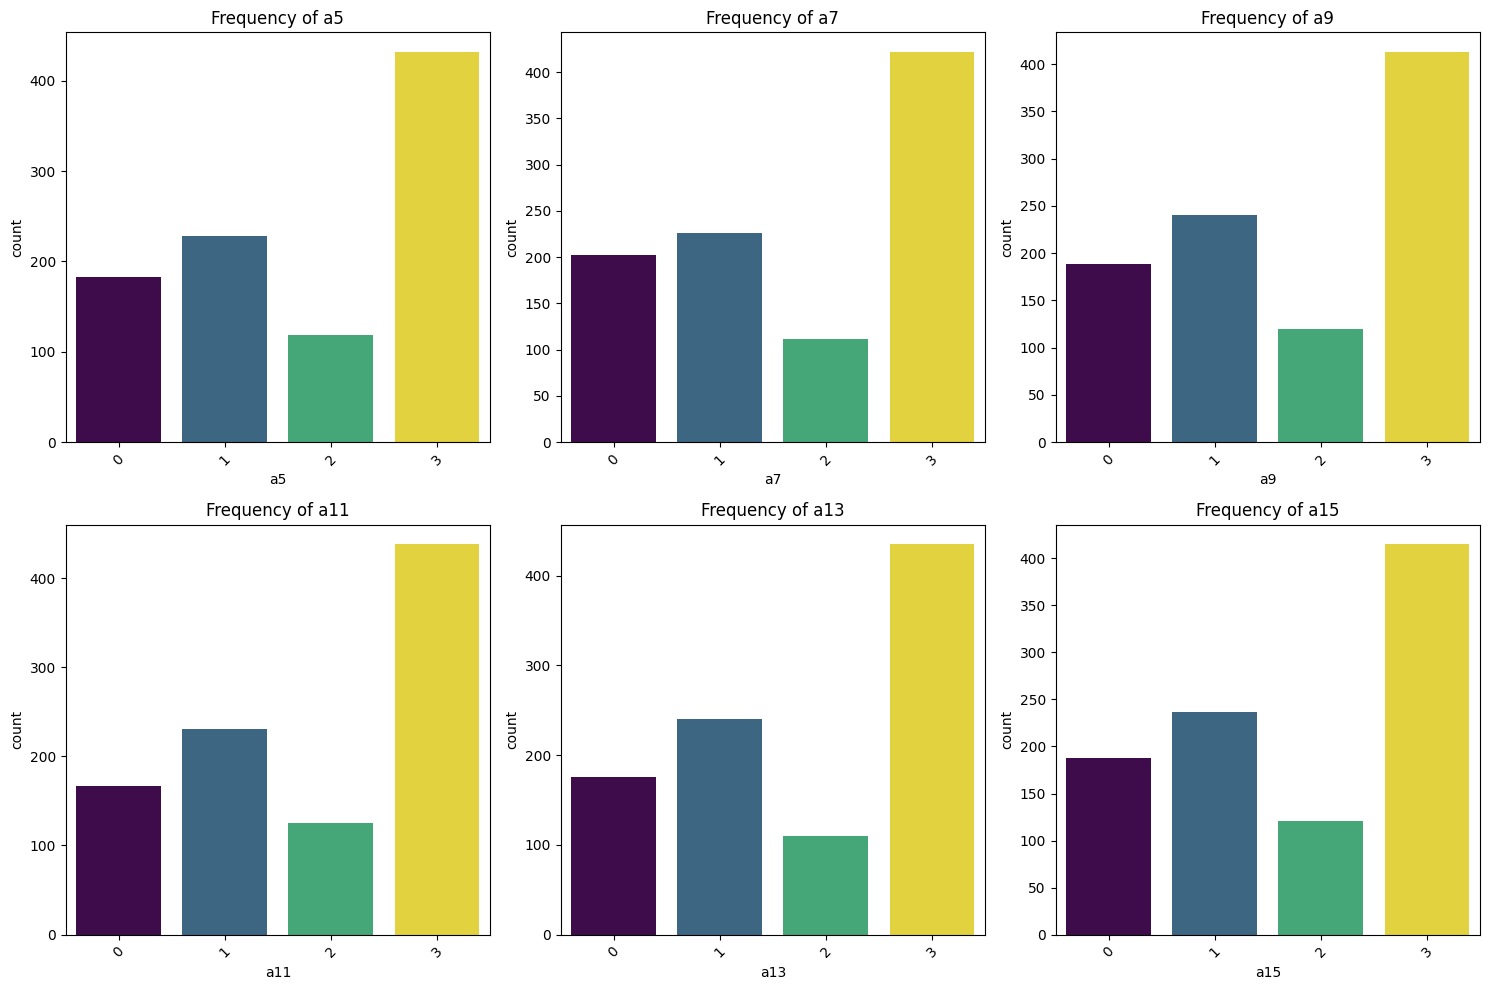

In [40]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6], 1):  # Plot first 6 categorical columns
    plt.subplot(2, 3, i)
    sns.countplot(data=X_train, x=col, hue= col, palette='viridis', legend=False)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


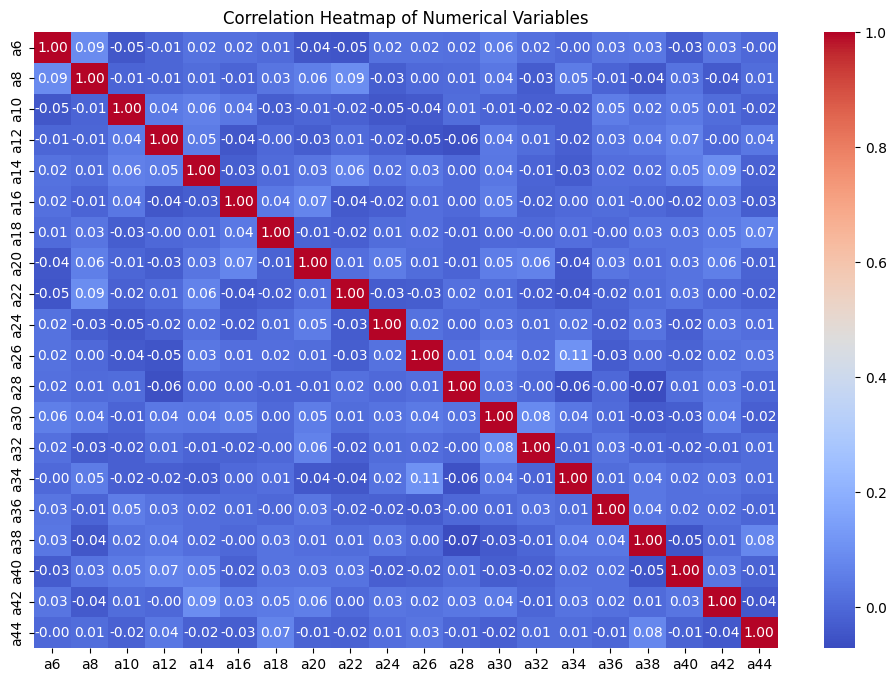

In [41]:
# 3. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(12, 8))
sns.heatmap(X_train[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

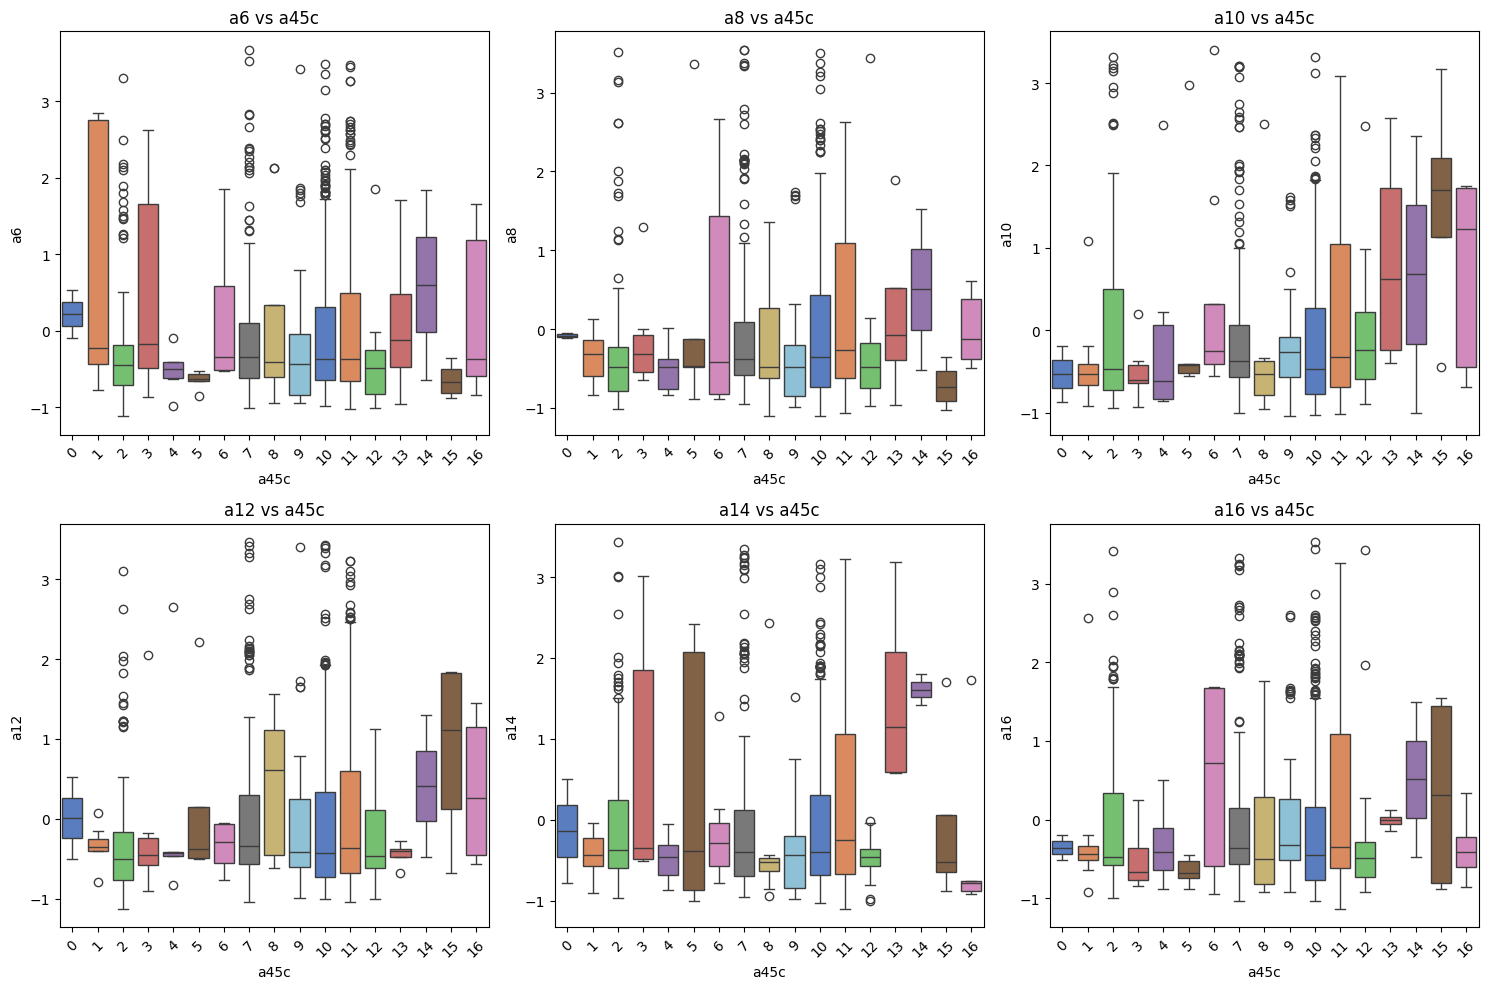

In [43]:
# 4. Relationship Between Numerical Features and Output (a45c)
X_train['a45c'] = y_train

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # First 6 numerical columns
    plt.subplot(2, 3, i)
    sns.boxplot(data=X_train, x='a45c', hue='a45c', y=col, palette='muted', legend=False)
    plt.title(f"{col} vs a45c")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

X_train = X_train.drop(columns=['a45c'])

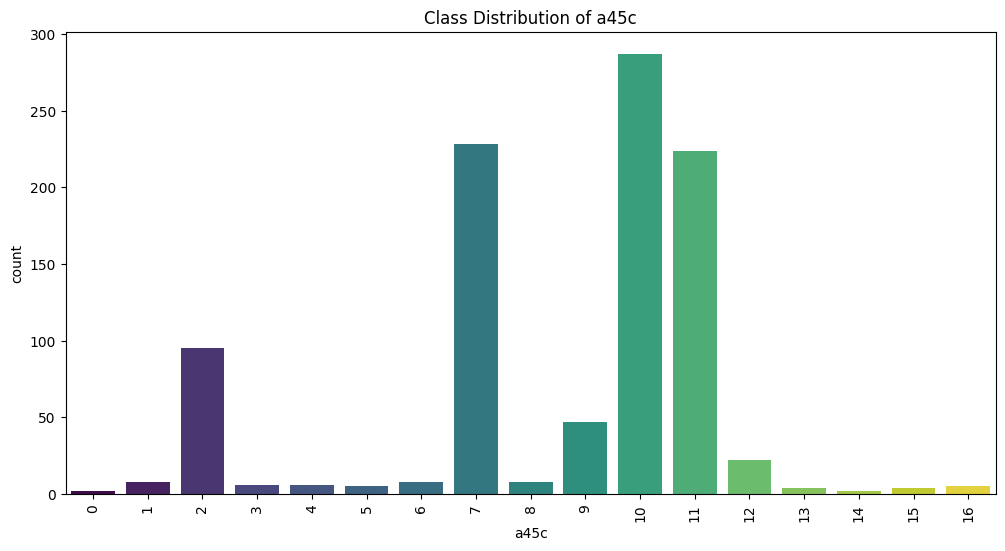

In [45]:
# 5. Class Distribution of the Output Variable (a45c)

X_train['a45c'] = y_train

plt.figure(figsize=(12, 6))
sns.countplot(data=X_train, x='a45c', hue='a45c', palette='viridis', legend=False)
plt.title('Class Distribution of a45c')
plt.xticks(rotation=90)
plt.show()

X_train = X_train.drop(columns=['a45c'])

We can see that the dataset is very imbalanced, having good representations of only 4 classes out of 16 different ones. 

### 1st ML Classifier - Random Forest

Tree-based classifiers can handle highly imbalanced data, since they partition the feature space clearly. 
In Random Forest algorithm, we can try tuning the class_weight parameter in order to handle imbalance.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Hyperparameter tuning with grid search

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt'],  # The number of features to consider at each split
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters Found: ", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=N

/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
416 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/anna/Uni/Master/MachineLearning/diterpenes/.

Best Parameters Found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [49]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Accuracy on Test Set (Best Model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))

Accuracy on Test Set (Best Model): 0.46887966804979253

Classification Report (Best Model):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.49      0.63      0.55        57
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        12
          10       0.44      0.62      0.51        72
          11       0.50      0.57      0.53        56
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.

/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anna/Uni/Master/MachineLearning/diterpenes/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

# 2nd ML algorithm - SVM

SVM finds a hyperplane or sets of hyperplanes which classify the dataset

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy on Test Set (Best Model):", accuracy_score(y_test, y_pred))